In [1]:
pip install torchvision


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


torch.Size([3, 28, 28])


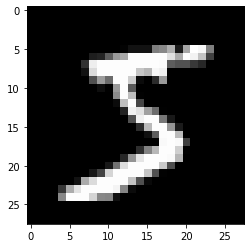

Start training...
Epoch 0 loss: 0.015610264614224434
Epoch 1 loss: 0.011153161525726318
Epoch 2 loss: 0.01038535125553608
Epoch 3 loss: 0.00983024574816227


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 4 loss: 0.011221978813409805
Done training!


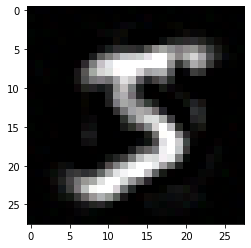

In [6]:
import torch
from torch import nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt

# Load mnist
mnist = torchvision.datasets.MNIST(root='./data', train=True, download=True)

class MnistDataset(torch.utils.data.Dataset):
    def __init__(self, mnist):
        self.mnist = mnist

    def __len__(self):
        return len(self.mnist)

    def __getitem__(self, index):
        img, target = self.mnist[index]
        img = img.convert('RGB')
        img = torch.tensor(np.array(img)/255.0, dtype=torch.float32)
        return img.reshape(3, 28, 28)

data = MnistDataset(mnist)
loader = torch.utils.data.DataLoader(data, batch_size=128, shuffle=True)

print(data[0].shape)
plt.imshow(data[0].reshape(28, 28, 3).numpy())
plt.show()

class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = nn.Sequential(
            nn.Linear(28 * 28 * 3, 128),
            nn.ReLU(),
            nn.Linear(128, 192),
        )
   
    def forward(self, x):
        x = self.block(x)
        return x

class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = nn.Sequential(
            nn.Linear(192, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28 * 3),
        )
   
    def forward(self, x):
        x = self.block(x)
        return x

class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
   
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = AutoEncoder()

optim = torch.optim.Adam(model.parameters(), lr=1e-3)

loss_fn = nn.MSELoss()

print("Start training...")
for i in range(5):
    for batch in loader:
        optim.zero_grad()
        x = batch.reshape(batch.shape[0], -1)
        y = model(x)
        loss = loss_fn(y, x)
        loss.backward()
        optim.step()
    print(f"Epoch {i} loss: {loss.item()}")
print("Done training!")

# testing...
test = data[0]
test = test.reshape(1, -1)
test = model(test)
test = test.reshape(28, 28, 3)
plt.imshow(test.detach().cpu().numpy())
plt.show()